### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**chrom** - Name of the chromosome or scaffold. Any valid string can be used.

**chromStart** - Starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.

**chromEnd** - Ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature. 
For example, the first 100 bases of a chromosome are defined as chromStart=0, chromEnd=100, and span the bases numbered 0-99.

**name** - Defines the name of the BED line. This label is displayed to the left of the BED line in the Genome Browser window when the track is open to full display.

**score** - A score between 0 and 1000. If the track line useScore attribute is set to 1 for this annotation data set, the score value will determine the level of gray in which this feature is displayed (higher numbers = darker gray). If there is no useScore attribute, the score value is ignored.

**strand** - Defines the strand. Either "." (=no strand) or "+" or "-".

**thickStart** - The starting position at which the feature is drawn thickly.

**thickEnd** - The ending position at which the feature is drawn thickly.

**itemRgb** - An RGB value of the form R,G,B (e.g. 255,0,0).

**blockCount** - The number of blocks (exons) in the BED line.

**blockSizes** - A comma-separated list of the block sizes. The number of items in this list should correspond to blockCount.

**blockStarts** - A comma-separated list of block starts. All of the blockStart positions should be calculated relative to chromStart.


#### GRCh38 CTCF

In [2]:
column_names = ["chrom", "chromStart", "chromEnd", "name", "score", "strand", "thickStart", "thickEnd", "itemRgb", "blockCount", "blockSizes", "blockStarts"]

with open("../ENCFF796WRU_GRCh38.bed", 'r') as f:
    ENCFF796WRU_GRCh38 = pd.read_csv(f, sep="\t", names=column_names, comment='#')

ENCFF796WRU_GRCh38.head()

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
0,chr12,53676107,53676353,.,1000,.,497.29450,-1.0,4.87269,126,NaN,NaN
1,chr17,37373596,37373838,.,1000,.,489.70457,-1.0,4.87269,126,NaN,NaN
2,chr5,43105741,43105981,.,1000,.,484.02790,-1.0,4.87269,129,NaN,NaN
3,chr19,40634550,40634789,.,1000,.,482.15478,-1.0,4.87269,119,NaN,NaN
4,chr16,57649099,57649346,.,1000,.,481.75910,-1.0,4.87269,119,NaN,NaN


#### hg19 CTCF

In [13]:
with open("../ENCFF710VEH_hg19.bed", 'r') as f:
    ENCFF710VEH_hg19 = pd.read_csv(f, sep="\t", names=column_names, comment='#')

# Rename the column
ENCFF710VEH_hg19.rename(columns={'chrom': 'ENCFF710VEH_hg19'}, inplace=True)

# Remove 'chr' from the values
ENCFF710VEH_hg19['ENCFF710VEH_hg19'] = ENCFF710VEH_hg19['ENCFF710VEH_hg19'].apply(lambda x: x.replace('chr', ''))
# find all strings "X" or "Y" and set equal to 23 and 24 respectively
ENCFF710VEH_hg19['ENCFF710VEH_hg19'] = ENCFF710VEH_hg19['ENCFF710VEH_hg19'].apply(lambda x: 23 if x == 'X' else x)
ENCFF710VEH_hg19['ENCFF710VEH_hg19'] = ENCFF710VEH_hg19['ENCFF710VEH_hg19'].apply(lambda x: 24 if x == 'Y' else x)

ENCFF710VEH_hg19 = ENCFF710VEH_hg19.sort_values(by=['ENCFF710VEH_hg19', 'chromStart']).reset_index(drop=True)
ENCFF710VEH_hg19.insert(0, 'CTCF ID', range(1, len(ENCFF710VEH_hg19) + 1))
ENCFF710VEH_hg19.head()

,CTCF ID,ENCFF710VEH_hg19,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
0,1,23,284934,285150,.,1000,.,108.03516,-1.0,4.87074,108,NaN,NaN
1,2,23,1220493,1220709,.,1000,.,95.86576,-1.0,4.87074,108,NaN,NaN
2,3,23,1257863,1257923,.,1000,.,151.28647,-1.0,4.87074,15,NaN,NaN
3,4,23,1363687,1363903,.,1000,.,117.12131,-1.0,4.87074,108,NaN,NaN
4,5,23,1365760,1365895,.,1000,.,243.01063,-1.0,4.87074,64,NaN,NaN


In [24]:
chromosome_sizes = {
    "chr1": 249250621,
    "chr2": 243199373,
    "chr3": 198022430,
    "chr4": 191154276,
    "chr5": 180915260,
    "chr6": 171115067,
    "chr7": 159138663,
    "chr8": 146364022,
    "chr9": 141213431,
    "chr10": 135534747,
    "chr11": 135006516,
    "chr12": 133851895,
    "chr13": 115169878,
    "chr14": 107349540,
    "chr15": 102531392,
    "chr16": 90354753,
    "chr17": 81195210,
    "chr18": 78077248,
    "chr19": 59128983,
    "chr20": 63025520,
    "chr21": 48129895,
    "chr22": 51304566,
    "chrX": 155270560,
    "chrY": 59373566
}

# Assuming chromosome_sizes is a dictionary where the keys are the chromosome names 
# and the values are the sizes of the chromosomes

# 1) Create a dictionary with the start positions of each chromosome
chromosome_starts = {}
total = 0
for chrom, size in sorted(chromosome_sizes.items()):
    chromosome_starts[chrom] = total
    total += size

# 2) Convert the genome-scale positions to intrachromosomal positions
for chrom in chromosome_starts:
    ENCFF710VEH_hg19.loc[(ENCFF710VEH_hg19['chrom'] == chrom) & (ENCFF710VEH_hg19['chromStart'] >= chromosome_starts[chrom]), 'chromStart'] -= chromosome_starts[chrom]
    ENCFF710VEH_hg19.loc[(ENCFF710VEH_hg19['chrom'] == chrom) & (ENCFF710VEH_hg19['chromEnd'] >= chromosome_starts[chrom]), 'chromEnd'] -= chromosome_starts[chrom]

#### GM128728 Loops

In [31]:
with open("../2014_map_rao_huntley/GSE63525_GM12878_primary+replicate_HiCCUPS_looplist_with_motifs.txt", 'r') as f:
    GM12878_motifs = pd.read_csv(f, sep="\t", comment='#')
    
GM12878_motifs.rename(columns={'chr1': 'GM12878_motifs'}, inplace=True)
GM12878_motifs["GM12878_motifs"] = GM12878_motifs["GM12878_motifs"]
# find all strings "X" or "Y" and set equal to 23 and 24 respectively
GM12878_motifs['GM12878_motifs'] = GM12878_motifs['GM12878_motifs'].apply(lambda x: '23' if x == 'X' else x)
GM12878_motifs['GM12878_motifs'] = GM12878_motifs['GM12878_motifs'].apply(lambda x: '24' if x == 'Y' else x)

GM12878_motifs = GM12878_motifs.sort_values(by=['GM12878_motifs', 'x1']).reset_index(drop=True)
GM12878_motifs.insert(0, 'Loop ID', range(1, len(GM12878_motifs) + 1))

GM12878_motifs.head()

,Loop ID,GM12878_motifs,x1,x2,chr2,y1,y2,color,o,e_bl,...,motif_x1,motif_x2,sequence_1,orientation_1,uniqueness_1,motif_y1,motif_y2,sequence2,orientation_2,uniqueness_2
0,1,1,1050000,1060000,1,1180000,1190000,"0,255,255",241,107.6730,...,1057642.0,1057662.0,CCCGCCTGCAGGTGGCGTCT,p,u,NaN,NaN,NaN,NaN,NaN
1,2,1,1585000,1590000,1,1645000,1650000,"0,255,255",80,31.1082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1710000,1715000,1,1835000,1840000,"0,255,255",154,74.0782,...,1710629.0,1710649.0,GGCACCTCTAGGGGGACCAG,p,i,NaN,NaN,NaN,NaN,NaN
3,4,1,2120000,2130000,1,2310000,2320000,"0,255,255",506,158.9130,...,2126787.0,2126807.0,TCGGCCACGTGGTGGCAGCA,p,u,2313354.0,2313374.0,GCATCCACCAGGGGGCAGCC,n,i
4,5,1,2130000,2135000,1,2515000,2520000,"0,255,255",52,22.7958,...,2126787.0,2126807.0,TCGGCCACGTGGTGGCAGCA,p,u,2510058.0,2510078.0,GCTGCCGCCAGGGGTCACAG,n,i


In [5]:
# Calculate the loop length
GM12878_motifs['loop_length'] = GM12878_motifs['y2'] - GM12878_motifs['x1']

# Compute the average loop length
average_loop_length = GM12878_motifs['loop_length'].mean()

# Print the average loop length
print(f"Average loop length: {average_loop_length}")

Average loop length: 1180488.4631668078


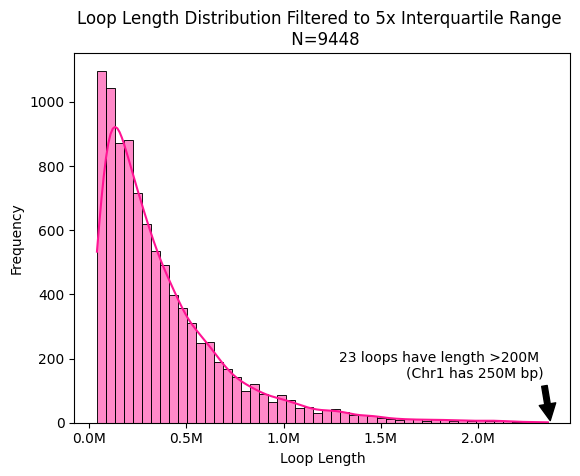

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = GM12878_motifs['loop_length'].quantile(0.25)
Q3 = GM12878_motifs['loop_length'].quantile(0.75)

# Compute the IQR (Interquartile Range)
IQR = Q3 - Q1

# Filter out the outliers
filtered_GM12878_motifs = GM12878_motifs[(GM12878_motifs['loop_length'] >= Q1 - 5 * IQR) & 
                                         (GM12878_motifs['loop_length'] <= Q3 + 5 * IQR)]

# Define a function to format the x-ticks
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Create the formatter
formatter = FuncFormatter(millions)

# Plotting the loop_length without outliers
sns.histplot(filtered_GM12878_motifs['loop_length'], bins=50, kde=True, color='deeppink', edgecolor='black', stat='count')
plt.title(f'Loop Length Distribution Filtered to 5x Interquartile Range \n N={len(GM12878_motifs)}')
plt.xlabel('Loop Length')
plt.ylabel('Frequency')

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(formatter)

plt.annotate('23 loops have length >200M \n(Chr1 has 250M bp)', xy=(0.96, 0), xycoords='axes fraction', xytext=(-5, 30),
             textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05),
             ha='right', va='bottom')

plt.show()

In [6]:
# Calculate the loop length
GM12878_motifs['anchor_length_x'] = GM12878_motifs['x2'] - GM12878_motifs['x1']
GM12878_motifs['anchor_length_y'] = GM12878_motifs['y2'] - GM12878_motifs['y1']

print(f"Average anchor length: X: {GM12878_motifs['anchor_length_x'].mean()}, Y: {GM12878_motifs['anchor_length_y'].mean()}")

Average anchor length: X: 6657.493649449619, Y: 6657.493649449619


Text(0, 0.5, 'Frequency')

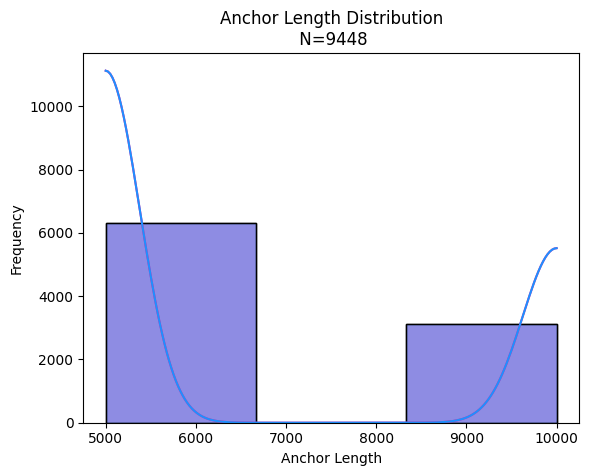

In [9]:
# Plotting the loop_length without outliers
sns.histplot(GM12878_motifs['anchor_length_x'], bins=3, kde=True, color='deeppink', edgecolor='black', stat='count')
sns.histplot(GM12878_motifs['anchor_length_y'], bins=3, kde=True, color='dodgerblue', edgecolor='black', stat='count')
plt.title(f'Anchor Length Distribution\n N={len(GM12878_motifs)}')
plt.xlabel('Anchor Length')
plt.ylabel('Frequency')

In [33]:
with open("../2014_map_rao_huntley/GSE63525_GM12878_subcompartments.bed", 'r') as f:
    GM12878_compartments = pd.read_csv(f, sep="\t", names=column_names, comment='#')

# Rename the column
GM12878_compartments.rename(columns={'chrom': 'GM12878_compartments'}, inplace=True)

# Remove 'chr' from the values
GM12878_compartments['GM12878_compartments'] = GM12878_compartments['GM12878_compartments'].apply(lambda x: x.replace('chr', '')).astype(str)
GM12878_compartments['GM12878_compartments'] = GM12878_compartments['GM12878_compartments'].apply(lambda x: '23' if x == 'X' else x)
GM12878_compartments['GM12878_compartments'] = GM12878_compartments['GM12878_compartments'].apply(lambda x: '24' if x == 'Y' else x)

# drop strand, thickStart, thickEnd, itemRgb, blockCount, blockSizes, blockStarts, itemRgb, 
GM12878_compartments.drop(columns=['strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts'], inplace=True)
GM12878_compartments.head()

,GM12878_compartments,chromStart,chromEnd,name,score
0,19,0,200000,NaN,0
1,19,200000,500000,B1,-1
2,19,500000,3800000,A1,2
3,19,3800000,3900000,B1,-1
4,19,3900000,5000000,A1,2


### Interval Tree

In [34]:
from intervaltree import Interval, IntervalTree
import pandas as pd

def find_overlaps(motifs_df, chr_col_motifs, start_col_motifs, end_col_motifs,
                  search_df, chr_col_search, start_col_search, end_col_search):
    
    # Ensure chromosome columns are strings
    motifs_df[chr_col_motifs] = motifs_df[chr_col_motifs].astype(str)
    search_df[chr_col_search] = search_df[chr_col_search].astype(str)
    
    chromosomes = [str(i) for i in range(1, 25)] #+ ['X']
    overlaps = []

    for chrom in chromosomes:
        motifs_chrom = motifs_df[motifs_df[chr_col_motifs] == chrom]
        search_chrom = search_df[search_df[chr_col_search] == chrom]

        tree = IntervalTree(Interval(row[start_col_motifs], row[end_col_motifs], index) for index, row in motifs_chrom.iterrows())

        for index, row in search_chrom.iterrows():
            overlapping_intervals = tree[row[start_col_search]:row[end_col_search]]
            overlaps.extend((index, interval.data) for interval in overlapping_intervals)

    overlapping_regions = pd.DataFrame([(search_df.loc[i1], motifs_df.loc[i2]) for i1, i2 in overlaps], 
                                       columns=['search_df', 'motifs_df'])

    result = pd.concat([overlapping_regions['search_df'].apply(pd.Series).set_axis(search_df.columns, axis=1),
                        overlapping_regions['motifs_df'].apply(pd.Series).set_axis(motifs_df.columns, axis=1)], axis=1)
    
    return result

In [29]:
from intervaltree import Interval, IntervalTree
import pandas as pd

def find_overlaps(motifs_df, chr_col_motifs, start_col_motifs, end_col_motifs,
                  search_df, chr_col_search, start_col_search, end_col_search):
    
    chromosomes = [str(i) for i in range(1, 25)] #+ ['X']
    overlaps = []

    for chrom in chromosomes:
        motifs_chrom = motifs_df[motifs_df[chr_col_motifs] == chrom]
        search_chrom = search_df[search_df[chr_col_search] == chrom]

        # Debugging prints
        if chrom == '23':
            print(f"Chromosome: {chrom}")
            print(f"Motifs Chromosome Data:\n{motifs_chrom}")
            print(f"Search Chromosome Data:\n{search_chrom}")

        if motifs_chrom.empty:
            if chrom == '23':
                print("No motifs data for chromosome 23")
            continue

        tree = IntervalTree()
        for index, row in motifs_chrom.iterrows():
            interval = Interval(row[start_col_motifs], row[end_col_motifs], index)
            tree.add(interval)
            # Print each interval being added to the tree
            if chrom == '23':
                print(f"Added interval to tree: {interval}")

        for index, row in search_chrom.iterrows():
            overlapping_intervals = tree[row[start_col_search]:row[end_col_search]]
            overlaps.extend((index, interval.data) for interval in overlapping_intervals)

    overlapping_regions = pd.DataFrame([(search_df.loc[i1], motifs_df.loc[i2]) for i1, i2 in overlaps], 
                                       columns=['search_df', 'motifs_df'])

    result = pd.concat([overlapping_regions['search_df'].apply(pd.Series).set_axis(search_df.columns, axis=1),
                        overlapping_regions['motifs_df'].apply(pd.Series).set_axis(motifs_df.columns, axis=1)], axis=1)
    
    return result

CTCF Overlap

__Why does the X chromosome have no CTCF overlaps?__

In [18]:
import pandas as pd
from intervaltree import Interval, IntervalTree

def search_intervals(df_tree, start_col_tree, end_col_tree, 
                     df_search, start_col_search, end_col_search):
    # Step 1: Construct the IntervalTree from the first dataframe
    tree = IntervalTree()
    for index, row in df_tree.iterrows():
        tree[row[start_col_tree]:row[end_col_tree]] = index

    # Step 2: Search the IntervalTree using intervals from the second dataframe
    matches = []
    for index, row in df_search.iterrows():
        overlapping_intervals = tree[row[start_col_search]:row[end_col_search]]
        for interval in overlapping_intervals:
            matches.append((index, interval.data))

    # Step 3: Create a dataframe with the matching intervals
    if matches:
        search_indices, tree_indices = zip(*matches)
        result_df = pd.DataFrame({
            'search_index': search_indices,
            'tree_index': tree_indices
        })
    else:
        result_df = pd.DataFrame(columns=['search_index', 'tree_index'])

    return result_df

#result = search_intervals(non_overlapping_intervals_df, 'null_x1', 'null_x2', 
#                          megabase_chr1, 'start', 'end')
#print(result)

In [19]:
result = search_intervals(GM12878_motifs[GM12878_motifs['GM12878_motifs'] == 23], 'x1', 'x2', 
                          ENCFF710VEH_hg19[ENCFF710VEH_hg19['ENCFF710VEH_hg19'] == 23], 'chromStart', 'chromEnd')

In [35]:
ctcf_overlaps_x = find_overlaps(GM12878_motifs, "GM12878_motifs", "x1", "x2",
                              ENCFF710VEH_hg19, "ENCFF710VEH_hg19", "chromStart", "chromEnd")
ctcf_overlaps_x.sort_values(by=["ENCFF710VEH_hg19", "chromStart"], inplace=True)

ctcf_overlaps_y = find_overlaps(GM12878_motifs, "GM12878_motifs", "y1", "y2",
                              ENCFF710VEH_hg19, "ENCFF710VEH_hg19", "chromStart", "chromEnd")
ctcf_overlaps_y.sort_values(by=["ENCFF710VEH_hg19", "chromStart"], inplace=True)

[QA/QC] CTCF marks that are shared between x and y loop anchors

~477 are shared. 

This is not a problem since it just means a loop anchor may appear as an X coordinate in one loop, but is the Y coordinate on another loop.

See [issue #1](https://github.com/darinddv/Hi-C-Loop-Prediction/issues/1) for more detail.

In [36]:
# Identify shared "CTCF ID" values
shared_ctcf_ids = ctcf_overlaps_x["CTCF ID"].isin(ctcf_overlaps_y["CTCF ID"])

# Get the shared values
shared_values = ctcf_overlaps_x[shared_ctcf_ids]["CTCF ID"].unique()

# Filter ctcf_overlaps_x by the shared "CTCF ID" values
filtered_ctcf_overlaps_x = ctcf_overlaps_x[ctcf_overlaps_x["CTCF ID"].isin(shared_values)]

print(filtered_ctcf_overlaps_x)

      CTCF ID ENCFF710VEH_hg19  chromStart   chromEnd name  score strand  \
64       1907                1    17563663   17563784    .   1000      .   
72       1969                1    19986435   19986526    .   1000      .   
73       1970                1    19988313   19988529    .   1000      .   
84       2040                1    22747057   22747195    .   1000      .   
114      2211                1    27425917   27426133    .    985      .   
...       ...              ...         ...        ...  ...    ...    ...   
4330    42959                9   112820762  112820882    .   1000      .   
4346    43059                9   117776387  117776533    .   1000      .   
4347    43060                9   117777403  117777619    .   1000      .   
4411    43382                9   133741920  133742015    .   1000      .   
4412    43382                9   133741920  133742015    .   1000      .   

      thickStart  thickEnd  itemRgb  ...     motif_x1     motif_x2  \
64     284.70733 

### Add chromatin compartment overlaps

In [22]:
x_subcompartment_overlaps = find_overlaps(GM12878_motifs, "GM12878_motifs", "x1", "x2",
                              GM12878_compartments, "GM12878_compartments", "chromStart", "chromEnd").sort_values(by=['GM12878_compartments', 'chromStart'])
y_subcompartment_overlaps = find_overlaps(GM12878_motifs, "GM12878_motifs", "y1", "y2",
                              GM12878_compartments, "GM12878_compartments", "chromStart", "chromEnd").sort_values(by=['GM12878_compartments', 'chromStart'])

ctcf_overlaps_x = ctcf_overlaps_x.merge(x_subcompartment_overlaps[['Loop ID', 'name']], on='Loop ID', how='left')
ctcf_overlaps_x.rename(columns={'name': 'name_x'}, inplace=True)

ctcf_overlaps_x = ctcf_overlaps_x.merge(y_subcompartment_overlaps[['Loop ID', 'name']], on='Loop ID', how='left')
ctcf_overlaps_x.rename(columns={'name': 'name_y'}, inplace=True)

ctcf_overlaps_x.head()

,CTCF ID,ENCFF710VEH_hg19,chromStart,chromEnd,name_x,score,strand,thickStart,thickEnd,itemRgb,...,orientation_1,uniqueness_1,motif_y1,motif_y2,sequence2,orientation_2,uniqueness_2,loop_length,name_y,name_y
0,1472,1,1057550,1057738,.,1000,.,342.40983,-1.0,4.87074,...,p,u,NaN,NaN,NaN,NaN,NaN,140000,A1,A1
1,1505,1,1710444,1710660,.,1000,.,65.90212,-1.0,4.87074,...,p,i,NaN,NaN,NaN,NaN,NaN,130000,A1,A1
2,1521,1,2126722,2126891,.,1000,.,277.66892,-1.0,4.87074,...,p,u,2313354.0,2313374.0,GCATCCACCAGGGGGCAGCC,n,i,200000,A1,B1
3,1529,1,2345938,2346079,.,1000,.,287.33577,-1.0,4.87074,...,p,u,2479625.0,2479645.0,CTAGCCACCAGGGGGCAGCA,n,i,130000,B1,A1
4,1529,1,2345938,2346079,.,1000,.,287.33577,-1.0,4.87074,...,p,u,3341433.0,3341453.0,GCAGCCTCCAGAGGGCGGCC,n,i,1000000,B1,B1


### Data characterization

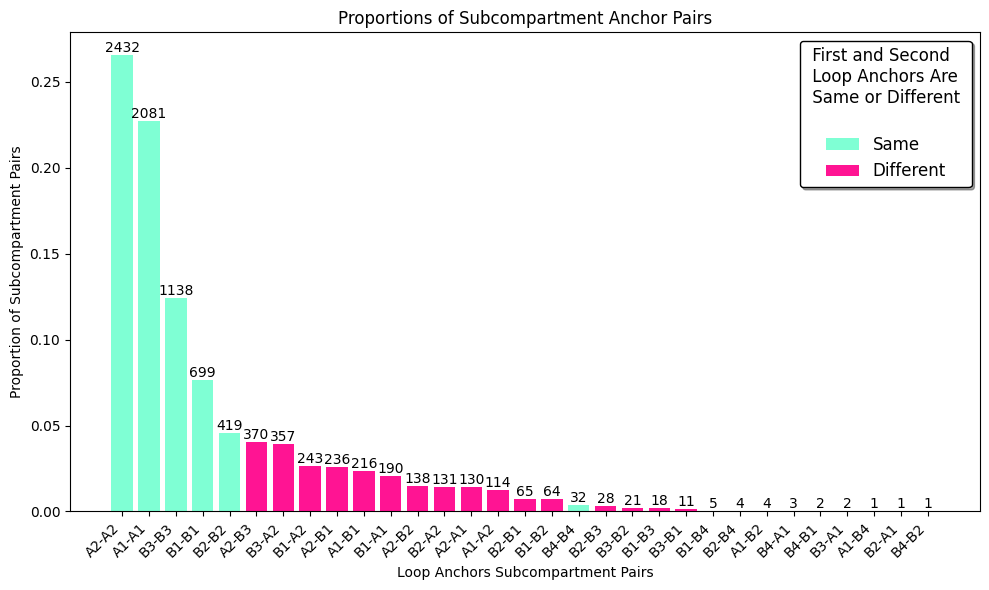

In [13]:
merged_df = pd.merge(x_subcompartment_overlaps[['Loop ID', 'name']], y_subcompartment_overlaps[['Loop ID', 'name']], on='Loop ID', suffixes=('_x', '_y'))
mismatched_df = merged_df[merged_df['name_x'] != merged_df['name_y']]

pair_counts = merged_df.groupby(['name_x', 'name_y']).size().reset_index(name='count')

import matplotlib.pyplot as plt

# Create a new column for the pair names
pair_counts['pair'] = pair_counts['name_x'] + '-' + pair_counts['name_y']

# Calculate proportions
pair_counts['proportion'] = pair_counts['count'] / pair_counts['count'].sum()
pair_counts = pair_counts.sort_values(by='proportion', ascending=False).reset_index(drop=True)

colors = ['aquamarine' if x == y else 'deeppink' for x, y in zip(pair_counts['name_x'], pair_counts['name_y'])]

plt.figure(figsize=(10, 6))
bars = plt.bar(pair_counts['pair'], pair_counts['proportion'], color=colors)

# Annotate bars with the count variable
for bar, count in zip(bars, pair_counts['count']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, count, ha='center', va='bottom')

plt.xlabel('Loop Anchors Subcompartment Pairs')
plt.ylabel('Proportion of Subcompartment Pairs')
plt.xticks(rotation=45, ha='right')
plt.title('Proportions of Subcompartment Anchor Pairs')
plt.tight_layout()

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='aquamarine', label='Same'),
                   Patch(facecolor='deeppink', label='Different')]
plt.legend(handles=legend_elements, title=' First and Second \n Loop Anchors Are \n Same or Different \n', loc='upper right', bbox_to_anchor=(1, 1), title_fontsize='large', fontsize='large', shadow=True, fancybox=True, frameon=True, edgecolor='black', facecolor='white', framealpha=1)

plt.show()

In [16]:
import plotly.graph_objects as go
from natsort import index_natsorted, order_by_index

chipseq_df = ctcf_overlaps_x[['ENCFF710VEH_hg19','chromStart', 'chromEnd']].sort_values(by=["ENCFF710VEH_hg19",'chromStart']).reset_index(drop=True)
loops_df = ctcf_overlaps_x[['GM12878_motifs','x1', 'x2']].sort_values(by= ['GM12878_motifs','x1']).reset_index(drop=True)

# Create a figure
fig = go.Figure()

# Add traces for 'chromStart' and 'chromEnd' from chipseq_df with increased line thickness
fig.add_trace(go.Scatter(x=chipseq_df.index, y=chipseq_df['chromStart'], mode='lines', name='Start CTCF Sequence', line=dict(width=3)))
fig.add_trace(go.Scatter(x=chipseq_df.index, y=chipseq_df['chromEnd'], mode='lines', name='End CTCF Sequence', fill='tonexty', line=dict(width=3)))

# Add traces for 'x1' and 'x2' from loops_df with increased line thickness
fig.add_trace(go.Scatter(x=loops_df.index, y=loops_df['x1'], mode='lines', name='Start Hi-C Loop Sequence', line=dict(width=3)))
fig.add_trace(go.Scatter(x=loops_df.index, y=loops_df['x2'], mode='lines', name='End Hi-C Loop Sequence', fill='tonexty', line=dict(width=3)))

# Set layout properties
fig.update_layout(title='Hi-C Loops and <br>CTCF Chip-seq Overlaps', xaxis_title='Index', yaxis_title='Position')
# write to html
#fig.write_html("intervals.html")
 
fig.show()

Calculate Amount of Overlap

In [18]:
import pandas as pd
import numpy as np

# Initialize counters
total_overlaps = 0
total_envelopments = 0
no_overlap = 0

# Lists to store indices and percent overlaps
not_enveloped_indices = []
non_overlapping_indices = []
overlap_lengths = []
percent_overlaps = []

# Extract relevant columns
x1 = loops_df['x1'].values
x2 = loops_df['x2'].values
chromStart = chipseq_df['chromStart'].values
chromEnd = chipseq_df['chromEnd'].values

# Create a meshgrid for vectorized comparison
x1_mesh, chromStart_mesh = np.meshgrid(x1, chromStart, indexing='ij')
x2_mesh, chromEnd_mesh = np.meshgrid(x2, chromEnd, indexing='ij')

# Calculate overlaps and envelopments
envelopments = (x1_mesh <= chromStart_mesh) & (x2_mesh >= chromEnd_mesh)
overlaps = (x1_mesh < chromEnd_mesh) & (x2_mesh > chromStart_mesh) & ~envelopments

# Count total envelopments and overlaps
total_envelopments = np.sum(envelopments)
total_overlaps = np.sum(overlaps)

# Calculate overlap lengths and percent overlaps
overlap_lengths = np.minimum(x2_mesh, chromEnd_mesh) - np.maximum(x1_mesh, chromStart_mesh)
chipseq_interval_lengths = chromEnd_mesh - chromStart_mesh
percent_overlaps = (overlap_lengths / chipseq_interval_lengths) * 100

# Filter valid overlaps
valid_overlaps = overlaps & (overlap_lengths > 0)
overlap_lengths = overlap_lengths[valid_overlaps]
percent_overlaps = percent_overlaps[valid_overlaps]

# Get indices of not enveloped and non-overlapping intervals
not_enveloped_indices = np.argwhere(valid_overlaps)
non_overlapping_indices = np.argwhere(~(envelopments | overlaps))

# Count non-overlapping intervals
no_overlap = len(non_overlapping_indices)

# After the loop, print the counts, list of overlap lengths, and percent overlaps
print(f'Sample Size: {len(loops_df)}')
print(f"Total simple overlaps: {total_overlaps}")
print(f"Total envelopments: {total_envelopments}")
print(f"Total non-overlapping intervals: {no_overlap}")
print(f"Overlap lengths: {overlap_lengths.tolist()}")
print(f"Percent overlaps: {percent_overlaps.tolist()}")

Sample Size: 7951
Total simple overlaps: 997
Total envelopments: 20693
Total non-overlapping intervals: 63196711
Overlap lengths: [103, 103, 4, 4, 4, 4, 4, 10, 10, 101, 101, 101, 101, 122, 122, 52, 52, 150, 55, 55, 27, 32, 34, 34, 34, 34, 91, 70, 70, 70, 70, 70, 70, 70, 70, 9, 9, 9, 9, 9, 9, 9, 9, 90, 189, 189, 189, 189, 189, 189, 189, 189, 70, 58, 37, 37, 127, 127, 39, 39, 126, 57, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 137, 137, 137, 137, 137, 137, 137, 137, 10, 10, 91, 9, 123, 123, 1, 98, 3, 3, 66, 108, 34, 16, 125, 187, 187, 187, 187, 194, 194, 194, 194, 49, 110, 110, 71, 71, 71, 71, 71, 71, 170, 170, 204, 82, 23, 23, 23, 23, 193, 193, 85, 63, 63, 63, 63, 93, 93, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 99, 99, 99, 99, 99, 99, 99, 99, 47, 153, 153, 153, 153, 82, 82, 35, 150, 113, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 59, 59, 59, 59, 68, 23, 23, 2, 29, 140, 176, 176, 73, 73, 73, 73, 98, 98, 1, 

In [19]:
# Ensure overlap_statistics is a separate DataFrame to avoid SettingWithCopyWarning
overlap_statistics = ctcf_overlaps_x[['ENCFF710VEH_hg19', 'chromStart', 'chromEnd', 'GM12878_motifs', 'x1', 'x2']].copy()

# Step 1: Calculate Overlap Length using .loc for safe assignment
overlap_statistics.loc[:, 'overlap_length'] = overlap_statistics.apply(lambda row: max(0, min(row['chromEnd'], row['x2']) - max(row['chromStart'], row['x1'])), axis=1)
overlap_statistics.loc[:, 'chip_length'] = overlap_statistics.apply(lambda row: row['chromEnd'] - row['chromStart'], axis=1)
overlap_statistics.loc[:, 'overlap_percentage'] = (overlap_statistics['overlap_length'] / overlap_statistics['chip_length']) * 100
# Step 2: Determine Overlap Type using a function and .loc for assignment
def determine_overlap_type(row):
    if row['chromStart'] <= row['x1'] and row['chromEnd'] >= row['x2']:
        return 'Complete Envelopment by Interval 1'
    elif row['x1'] <= row['chromStart'] and row['x2'] >= row['chromEnd']:
        return 'Complete Envelopment by Interval 2'
    elif row['overlap_length'] > 0:
        return 'Simple Overlap'
    else:
        return 'No Overlap'

overlap_statistics.loc[:, 'overlap_type'] = overlap_statistics.apply(determine_overlap_type, axis=1)

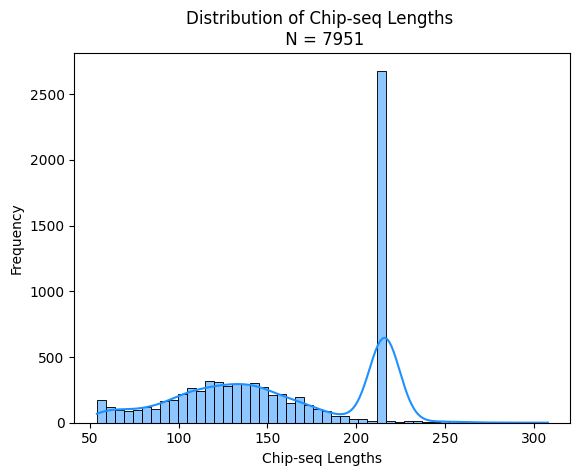

In [20]:

# Assuming overlap_lengths is a list of overlap lengths

sns.histplot(overlap_statistics['chip_length'], bins=50, kde=True, color='dodgerblue', edgecolor='black', stat='count')
plt.title(f'Distribution of Chip-seq Lengths \n N = {len(overlap_statistics)}')
plt.xlabel('Chip-seq Lengths')
plt.ylabel('Frequency')
plt.show()

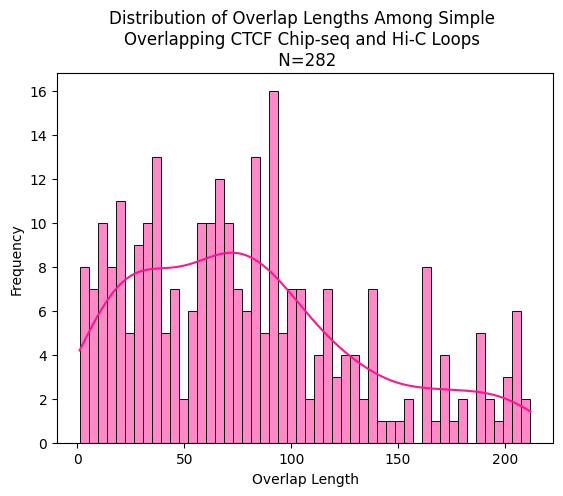

In [21]:
# Filter the DataFrame for 'Simple Overlap'
simple_overlap = overlap_statistics[overlap_statistics['overlap_type'] == 'Simple Overlap']

# Plotting the overlap_length for 'Simple Overlap'
sns.histplot(simple_overlap['overlap_length'], bins=50, kde=True, color='deeppink', edgecolor='black', stat='count')
plt.title(f'Distribution of Overlap Lengths Among Simple \nOverlapping CTCF Chip-seq and Hi-C Loops \n N={len(simple_overlap)}')
plt.xlabel('Overlap Length')
plt.ylabel('Frequency')
plt.show()

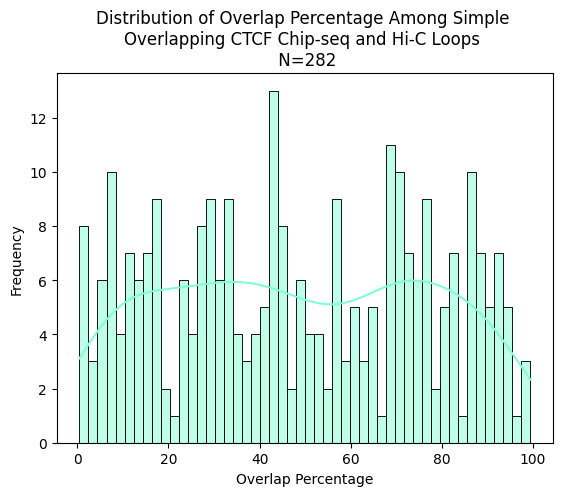

In [22]:

# Plotting the overlap_length for 'Simple Overlap'
sns.histplot(simple_overlap['overlap_percentage'], bins=50, kde=True, color='aquamarine', edgecolor='black', stat='count')
plt.title(f'Distribution of Overlap Percentage Among Simple \nOverlapping CTCF Chip-seq and Hi-C Loops \n N={len(simple_overlap)}')
plt.xlabel('Overlap Percentage')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Assuming ctcf_overlaps is your DataFrame that you want to filter
filtered_ctcf_overlaps = ctcf_overlaps_x.iloc[not_enveloped_loops.index]

print(ctcf_overlaps_x["orientation_1"].value_counts())
print(ctcf_overlaps_x["orientation_2"].value_counts())

print(filtered_ctcf_overlaps["orientation_1"].value_counts())
print(filtered_ctcf_overlaps["orientation_2"].value_counts())

NameError: name 'not_enveloped_loops' is not defined

is the information that determines chromosomal organization contaiend within epigenetic markers,

Predict other features besides loops: enhancers and promoters. 

GENOME ORANIZATION FROM EPIGENETICS. 

In [24]:
# filter gm12878_motifs to include only rows where sequence_1 and sequence_2 are not nan or NaN
both_anchors = GM12878_motifs[GM12878_motifs['sequence_1'].notnull() & GM12878_motifs['sequence2'].notnull()]
atleast_one_anchor = GM12878_motifs[GM12878_motifs['sequence_1'].notnull() | GM12878_motifs['sequence2'].notnull()]

print("Both anchors:",len(both_anchors), round(len(both_anchors)/len(GM12878_motifs)*100),'%')
print("At least one anchor:",len(atleast_one_anchor), round(len(atleast_one_anchor)/len(GM12878_motifs)*100),'%')
print("Loops where no anchor has motif:",len(GM12878_motifs) - len(atleast_one_anchor),(len(GM12878_motifs) - len(atleast_one_anchor))/len(GM12878_motifs)*100,'%')
# count null on sequence_1 and sequence_2
print(GM12878_motifs['sequence_1'].isnull().sum())
print(GM12878_motifs['sequence2'].isnull().sum())


Both anchors: 3974 42 %
At least one anchor: 8007 85 %
Loops where no anchor has motif: 1441 15.25190516511431 %
3493
3422


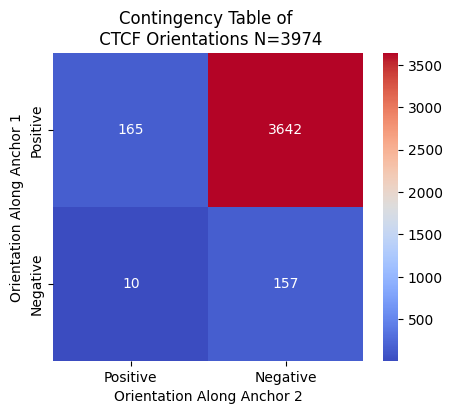

In [25]:

pp = len(both_anchors[(both_anchors['orientation_1'] == 'p') & (both_anchors['orientation_2'] == 'p')])
np = len(both_anchors[(both_anchors['orientation_1'] == 'n') & (both_anchors['orientation_2'] == 'p')])
pn = len(both_anchors[(both_anchors['orientation_1'] == 'p') & (both_anchors['orientation_2'] == 'n')])
nn = len(both_anchors[(both_anchors['orientation_1'] == 'n') & (both_anchors['orientation_2'] == 'n')])
contingency_table = {
    'Positive': [pp, np],
    'Negative': [pn, nn]
}
index = ['Positive', 'Negative']
contingency_table_df = pd.DataFrame(contingency_table, index=index)
plt.figure(figsize=(5, 4))
sns.heatmap(contingency_table_df, annot=True, cmap='coolwarm', fmt='g')
plt.title(f'Contingency Table of \n CTCF Orientations N={len(both_anchors)}')
# add axis label
plt.xlabel('Orientation Along Anchor 2')
plt.ylabel('Orientation Along Anchor 1')
plt.show()


Loops

In [26]:
import plotly.graph_objects as go
import pandas as pd

filtered_GM12878_motifs = GM12878_motifs[GM12878_motifs['GM12878_motifs'] == '20']

if filtered_GM12878_motifs.empty:
    print("No data to plot.")
else:
    fig = go.Figure()

    # Plot each motif
    for _, row in filtered_GM12878_motifs.iterrows():
        # Plot line for each motif
        fig.add_trace(go.Scatter(x=[row['x1'], row['x2']], y=[row['y1'], row['y2']],
                                 mode='lines+markers', marker=dict(color='blue')))
        
        # Plot centroid
        fig.add_trace(go.Scatter(x=[row['centroid1']], y=[row['centroid2']],
                                 mode='markers', marker=dict(color='red', size=10)))
        
        # Plot circle around centroid
        fig.add_shape(type="circle",
                      xref="x", yref="y",
                      x0=row['centroid1']-row['radius'], y0=row['centroid2']-row['radius'],
                      x1=row['centroid1']+row['radius'], y1=row['centroid2']+row['radius'],
                      line_color="blue",)

    # Set aspect of the plot to be equal, so circles aren't oval
    fig.update_layout(showlegend=False,
                      xaxis_title="X Coordinate",
                      yaxis_title="Y Coordinate",
                      title="GM12878 Motifs Visualization",
                      xaxis=dict(scaleanchor="y", scaleratio=1),
                      yaxis=dict(scaleanchor="x", scaleratio=1))
    
    fig.show()

### Design Matrix

### Make ID dataframe by merging chip IDs matched to loop IDs into original loop dataframe
Set rows where no chip matched to NA

To make data matrix for model, set all non-NA values to 1, else 0

For non-loop data, use non-matched chip locations, or random non-loop segments

Null cases

In [10]:
# Combine the "CTCF ID" columns from ctcf_overlaps_x and ctcf_overlaps_y
combined_ctcf_ids = pd.concat([ctcf_overlaps_x["CTCF ID"], ctcf_overlaps_y["CTCF ID"]]).unique()

# Filter ENCFF710VEH_hg19 to exclude rows with "CTCF ID" in combined_ctcf_ids
non_loop_ctcf = ENCFF710VEH_hg19[~ENCFF710VEH_hg19["CTCF ID"].isin(combined_ctcf_ids)]


Anchors for Chr1 

In [11]:
import pandas as pd

# Combine intervals from both DataFrames
filtered_x = ctcf_overlaps_x[ctcf_overlaps_x['GM12878_motifs'] == '1'][['x1', 'x2']].rename(columns={'x1': 'start', 'x2': 'end'})
filtered_y = ctcf_overlaps_y[ctcf_overlaps_y['GM12878_motifs'] == '1'][['y1', 'y2']].rename(columns={'y1': 'start', 'y2': 'end'})

combined_intervals = pd.concat([filtered_x, filtered_y])

# Sort intervals by start position
combined_intervals = combined_intervals.sort_values(by='start').reset_index(drop=True)

# Function to generate non-overlapping intervals
def generate_non_overlapping_intervals(intervals, interval_size):
    non_overlapping_intervals = []
    current_position = 0

    for _, row in intervals.iterrows():
        start, end = row['start'], row['end']
        while current_position + interval_size <= start:
            non_overlapping_intervals.append((current_position, current_position + interval_size))
            current_position += interval_size
        current_position = max(current_position, end)

    return non_overlapping_intervals

# Generate non-overlapping intervals of a given size (e.g., 10000)
interval_size = 10000
non_overlapping_intervals = generate_non_overlapping_intervals(combined_intervals, interval_size)

# Convert the list of non-overlapping intervals to a DataFrame
non_overlapping_intervals_df = pd.DataFrame(non_overlapping_intervals, columns=['null_x1', 'null_x2'])
non_overlapping_intervals_df.insert(0, 'Non-Loop ID', range(1, len(non_overlapping_intervals_df) + 1))

print(non_overlapping_intervals_df)

       Non-Loop ID    null_x1    null_x2
0                1          0      10000
1                2      10000      20000
2                3      20000      30000
3                4      30000      40000
4                5      40000      50000
...            ...        ...        ...
24081        24082  249050000  249060000
24082        24083  249060000  249070000
24083        24084  249070000  249080000
24084        24085  249080000  249090000
24085        24086  249090000  249100000

[24086 rows x 3 columns]


Test that non-overlaps truly don't overlap x1:x2 interval

In [12]:
non_overlapping_intervals_df["chrom"] = 1

In [13]:
null_overlaps = find_overlaps(GM12878_motifs[GM12878_motifs["GM12878_motifs"] == 1], "GM12878_motifs", "x1", "x2",
                              non_overlapping_intervals_df, "chrom", "null_x1", "null_x2")
#null_overlaps.sort_values(by=["chrom", "start"], inplace=True)


#### Make second 'anchor' for non-loops

In [14]:
import pandas as pd

# Assuming non_overlapping_intervals_df is already defined

# Add 200,000 to the 'end' column to create the 'start' column for the new intervals
non_overlapping_intervals_df['null_y1'] = non_overlapping_intervals_df['null_x2'] + 200000

# Optionally, create an 'end' column for the new intervals
# For example, if you want the new intervals to have a fixed length of 100,000
non_overlapping_intervals_df['null_y2'] = non_overlapping_intervals_df['null_y1'] + interval_size

# Display the updated DataFrame
print(non_overlapping_intervals_df)

       Non-Loop ID    null_x1    null_x2  chrom    null_y1    null_y2
0                1          0      10000      1     210000     220000
1                2      10000      20000      1     220000     230000
2                3      20000      30000      1     230000     240000
3                4      30000      40000      1     240000     250000
4                5      40000      50000      1     250000     260000
...            ...        ...        ...    ...        ...        ...
24081        24082  249050000  249060000      1  249260000  249270000
24082        24083  249060000  249070000      1  249270000  249280000
24083        24084  249070000  249080000      1  249280000  249290000
24084        24085  249080000  249090000      1  249290000  249300000
24085        24086  249090000  249100000      1  249300000  249310000

[24086 rows x 6 columns]


Check second anchor for overlap with true loop anchors in both x and y

In [15]:
null_overlaps = find_overlaps(GM12878_motifs[GM12878_motifs["GM12878_motifs"] == 1], "GM12878_motifs", "x1", "x2",
                              non_overlapping_intervals_df, "chrom", "null_x1", "null_x2")
#null_overlaps.sort_values(by=["chrom", "start"], inplace=True)

#null_overlaps = find_overlaps(GM12878_motifs[GM12878_motifs["GM12878_motifs"] == 1], "GM12878_motifs", "y1", "y2",
#                              non_overlapping_intervals_df, "chrom", "null_y1", "null_y2")

print(len(null_overlaps))

0


Compartments for null cases

In [16]:
megabase_chr1 = pd.read_csv("./megabase_chr1_oliviera_gm12878.csv")
# set all values in "chromosome" column to 1
megabase_chr1["chromosome"] = 1
# make sure "start" and "end" columns are integers
megabase_chr1["start"] = megabase_chr1["start"].astype(int)
megabase_chr1["end"] = megabase_chr1["end"].astype(int)

In [26]:
non_overlapping_intervals_df["null_x1"].dtypes

dtype('int64')

In [29]:
#x_subcompartment_overlaps = find_overlaps(non_overlapping_intervals_df, "chrom", "null_x1", "null_x2",
#                             megabase_chr1, "chromosome", "start", "end")#.sort_values(by=['chromosome', 'start'])

x_subcompartment_overlaps = find_overlaps(megabase_chr1, "chromosome", "start", "end",
                                          non_overlapping_intervals_df, "chrom", "null_x1", "null_x2")#.sort_values(by=['chromosome', 'start'])



#y_subcompartment_overlaps = find_overlaps(non_overlapping_intervals_df, "chrom", "null_y1", "null_y2",
#                              megabase_chr1, "chromosome", "start", "end")#.sort_values(by=['chromosome', 'start'])


In [32]:
import pandas as pd
from intervaltree import Interval, IntervalTree

def search_intervals(df_tree, start_col_tree, end_col_tree, df_search, start_col_search, end_col_search):
    # Step 1: Construct the IntervalTree from the first dataframe
    tree = IntervalTree()
    for index, row in df_tree.iterrows():
        tree[row[start_col_tree]:row[end_col_tree]] = index

    # Step 2: Search the IntervalTree using intervals from the second dataframe
    matches = []
    for index, row in df_search.iterrows():
        overlapping_intervals = tree[row[start_col_search]:row[end_col_search]]
        for interval in overlapping_intervals:
            matches.append((index, interval.data))

    # Step 3: Create a dataframe with the matching intervals
    if matches:
        search_indices, tree_indices = zip(*matches)
        result_df = pd.DataFrame({
            'search_index': search_indices,
            'tree_index': tree_indices
        })
    else:
        result_df = pd.DataFrame(columns=['search_index', 'tree_index'])

    return result_df

result = search_intervals(non_overlapping_intervals_df, 'null_x1', 'null_x2', 
                          megabase_chr1, 'start', 'end')
print(result)

       search_index  tree_index
0                 0           0
1                 0           1
2                 0           2
3                 0           3
4                 0           4
...             ...         ...
24964          4981       24081
24965          4981       24082
24966          4981       24083
24967          4981       24084
24968          4981       24085

[24969 rows x 2 columns]


Map CTCF to non-loops

Since the null cases are based on the sequence intervals of chromosome 1, the null 'loops' can be reused, but CTCF needs to be aligned per chromosome in the chip-seq data.

To generate a new chromosome of null 'loops', just truncate the null data at the appropriate chromosome length
- drop all rows past where x1,x2,y1, or y2 are closest to the cutoff.

In [19]:
null_ctcf_overlaps_x = find_overlaps(non_overlapping_intervals_df, "chrom", "null_x1", "null_x2",
                              ENCFF710VEH_hg19[ENCFF710VEH_hg19["ENCFF710VEH_hg19"]=='1'], "ENCFF710VEH_hg19", "chromStart", "chromEnd")
#null_ctcf_overlaps_x.sort_values(by=["chrom", "x1"], inplace=True)

In [16]:
non_overlapping_intervals_df["chrom"] = non_overlapping_intervals_df["chrom"].astype(str)
non_overlapping_intervals_df["chrom"].dtype

dtype('O')

#### ID Matrix

Some loops have more than one overlapping CTCF

In [20]:
ctcf_overlaps_x = ctcf_overlaps_x.drop_duplicates(subset='Loop ID')
ctcf_overlaps_y = ctcf_overlaps_y.drop_duplicates(subset='Loop ID')

In [26]:
id_matrix = pd.DataFrame(GM12878_motifs["Loop ID"])

# Merge id_matrix with the subset on "Loop ID" using a left join and rename the column
id_matrix = id_matrix.merge(
    ctcf_overlaps_x[['Loop ID', 'CTCF ID']].rename(columns={'CTCF ID': 'X CTCF ID'}),
    on="Loop ID",
    how="left"
)

id_matrix = id_matrix.merge(
    ctcf_overlaps_y[['Loop ID', 'CTCF ID']].rename(columns={'CTCF ID': 'Y CTCF ID'}),
    on="Loop ID",
    how="left"
)

id_matrix = id_matrix.merge(
    x_subcompartment_overlaps[['Loop ID', 'name']].rename(columns={'name': 'X Subcompartment'}),
    on="Loop ID",
    how="left"
)

id_matrix = id_matrix.merge(
    y_subcompartment_overlaps[['Loop ID', 'name']].rename(columns={'name': 'Y Subcompartment'}),
    on="Loop ID",
    how="left"
)

In [20]:
null_id_matrix = pd.DataFrame(non_overlapping_intervals_df["Non-Loop ID"])

null_id_matrix = null_id_matrix.merge(
    y_subcompartment_overlaps[['Loop ID', 'name']].rename(columns={'name': 'Y Subcompartment'}),
    on="Loop ID",
    how="left"
)

KeyError: 'Loop ID'